# Espace de Fourier

In [1]:
from warnings import simplefilter

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import patches
from numpy.fft import fft2, fftshift, ifft2
from skimage.exposure import rescale_intensity

In [2]:
simplefilter('ignore',lineno=2366)
rcParams['figure.facecolor'] = 'white'

## Image de base

In [3]:
pil_img = Image.open('slice_86.png')
img_tot = np.array(pil_img)
img = img_tot[100:360,40:470].astype('uint16') # 'zoom on patient'
im = rescale_intensity(img,in_range=(0,1400),out_range='uint8')

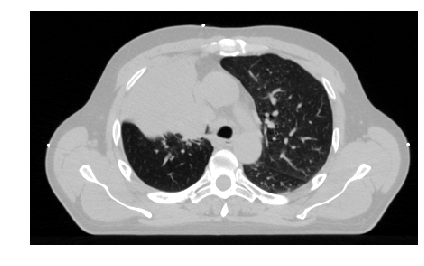

In [4]:
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.show()

## Transformée de Fourier et filtre fréquentiel

In [5]:
a = fft2(im)
ft = fftshift(a)

sx = ft.shape[0]
sy = ft.shape[1]
ftc = ft.copy()
ftc_display = np.zeros(ft.shape)
for i in range(sx):
    for j in range(sy):
        if ( (i - sx/2)**2 + (j-sy/2)**2 ) > 70**2:
            ftc[i,j] = 0
        else:
            ftc_display[i,j] = np.log(np.abs(ftc[i,j].real))

ac = fftshift(ftc)
imc = ifft2(ac).real

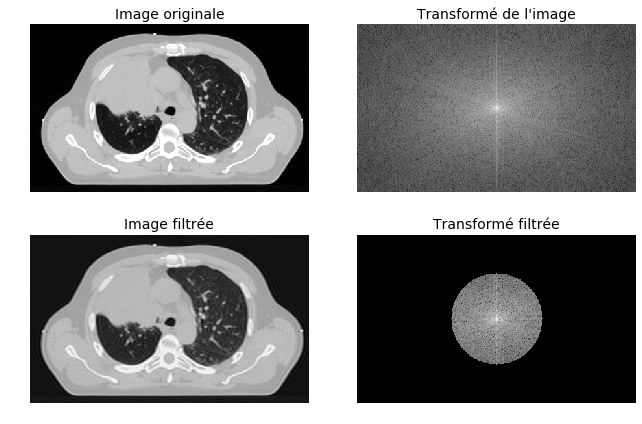

In [6]:
fig = plt.figure(figsize=(10,6))

ax = plt.subplot(2,2,1)
plt.imshow(im,cmap='gray')
ax.set_title('Image originale', fontsize=14)
plt.axis('off')

ax = plt.subplot(2,2,2)
plt.imshow(np.log(np.abs(ft)),cmap='gray')
ax.set_title('Transformé de l\'image', fontsize=14)
plt.axis('off')

ax = plt.subplot(2,2,3)
plt.imshow(imc,cmap='gray')
ax.set_title('Image filtrée', fontsize=14)
plt.axis('off')

ax = plt.subplot(2,2,4)
plt.imshow(ftc_display,cmap='gray')
ax.set_title('Transformé filtrée', fontsize=14)
plt.axis('off')

plt.savefig('output/fourier_filter.png',transparent=True)
plt.show()

## Opération de convolution

In [14]:
# Build a gaussian spot
x, y = np.meshgrid(np.linspace(-215,215,430),np.linspace(-130,130,260))
d = np.sqrt(x*x+y*y)
sigma, mu = 3.0, 0.0
g = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )

In [18]:
im_ft = fftshift(fft2(im))
g_ft = fftshift(fft2(g))

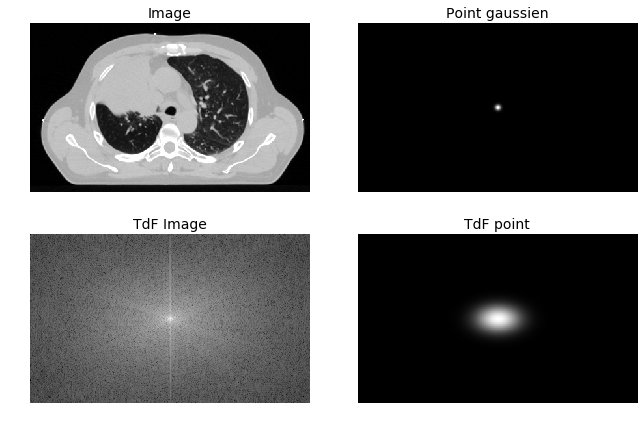

In [40]:
fig = plt.figure(figsize=(10,6))

ax = plt.subplot(2,2,1)
plt.imshow(im,cmap='gray')
ax.set_title('Image', fontsize=14)
plt.axis('off')

ax = plt.subplot(2,2,2)
plt.imshow(g,cmap='gray')
ax.set_title('Point gaussien', fontsize=14)
plt.axis('off')

ax = plt.subplot(2,2,3)
plt.imshow(np.log(np.abs(im_ft)),cmap='gray')
ax.set_title('TdF Image', fontsize=14)
plt.axis('off')

ax = plt.subplot(2,2,4)
plt.imshow(np.abs(g_ft),cmap='gray')
ax.set_title('TdF point', fontsize=14)
plt.axis('off')

plt.savefig('output/fft_conv_1.png',transparent=True)
plt.show()

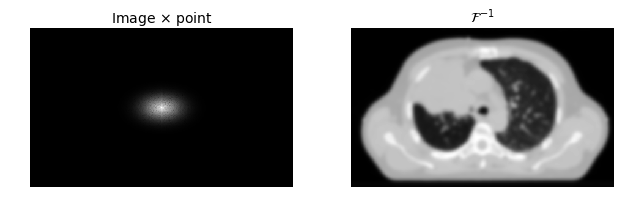

In [41]:
fig = plt.figure(figsize=(10,3))

conv_show = np.log(np.abs(im_ft))*np.abs(g_ft)
ax = plt.subplot(1,2,1)
plt.imshow(conv_show,cmap='gray')
ax.set_title(r'Image $\times$ point', fontsize=14)
plt.axis('off')

ax = plt.subplot(1,2,2)
img_ift = ifft2(fftshift(im_ft*np.abs(g_ft))).real
plt.imshow(img_ift,cmap='gray')
ax.set_title(r'$\mathcal{F}^{-1}$', fontsize=14)
plt.axis('off')

plt.savefig('output/fft_conv_2.png',transparent=True)
plt.show()